# Red Neuronal desde Cero
Creamos una red neuronal que nos ayudará a clasificar datos 

![](http://i63.tinypic.com/xg9jpi.jpg)



Similar a la que es usada para identificar células cancerígenas:

![](https://s.aolcdn.com/hss/storage/midas/b62be378b2794a50f63005d23f51f423/206316387/f2.png)

In [0]:
#Importamos Librerias
import numpy as np
import scipy as sc
import matplotlib.pyplot as plt

from sklearn.datasets import make_circles

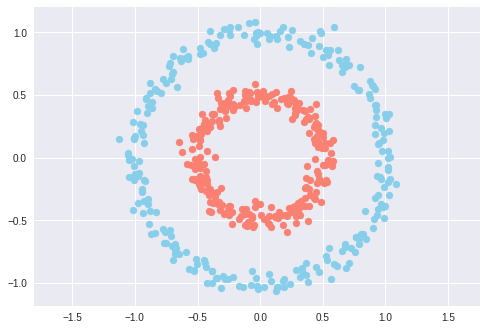

In [14]:
#Creamos el dataset
n= 500 #Número de registros que tenemos en nuestro dataset (ejemplos)
p = 2  #Características de cada uno de los registros de los datos (columns)

X, Y = make_circles(n_samples = n, noise=0.05, factor = 0.5) #Factor es distancia entre los círculos

Y = Y[:, np.newaxis]

plt.scatter(X[Y[:, 0]==0, 0], X[Y[:, 0]==0, 1], c='skyblue')
plt.scatter(X[Y[:, 0]==1, 0], X[Y[:, 0]==1, 1], c='salmon')
plt.axis('equal')
plt.show()


Ya tenemos nuestro dataset, ahora lo que haremos es crear la red neuronal que **nos separe en dos clases diferentes** la nube de puntos de color salmón

En la red neuronal su unidad de procesamiento es la neurona y podemos unir varias neuronas en diferentes capas para conseguir ésta codificación y procesamiento de información más compleja (red neuronal. )

Una conclusión que se puede llegar es que al final casi todas las formulas implementadas dentro de nuestra red neuronal son posibles de vectorizar lo que ayuda a tener un mejor rendimiento a la hora de procesar información con las redes neuronales debido a que están vectorizadas y, de igual forma, permite utilizar las fórmulas de manera **vectorizada**.

***`NOTA:`*** *dento de una misma capa estamos realizando las mismas operaciones para todas las neuronas, ya que aplicamos la misma función de activación y las mismas fórmulas de backpropagation *

Si nosotros podemos considerar una red neuronal como si fuera la unidad de procesamiento a las neuronas otra forma de verlo sería pensar que cada capa es un módulo, dentro de cada capa van a realizarse las mismas operaciones.

# Clase de la Capa de la Red
Será una estructura de datos y sólo tendrá los valores de los parámetros (w, b)

In [0]:
#CLASE DE LA CAPA DE LA RED


class neural_layer:       
  
  def __init__(self, n_conn, n_neur, act_f): 
    self.act_f = act_f  #función de activación de la capa será igual al parámetro ingresado
    
    #Inicializamos de modo aleatorio, b = bayes
    #Nos interesa que la iniciación sea en torno a la media '0', normalizada y estandarizada
    
    self.b = np.random.rand(1, n_neur) *2 -1  # Vector.Como random nos da un número aleatorio entre (0,1) le realizamos operaciones para que nos dé entre (-1, 1)
    self.W = np.random.rand(n_conn, n_neur) *2 -1 # Matriz
      

**Recordemos:** Entre dos capas tenemos tantas conexiones (n_conn) como el número de neuronas que hay en la capa anterior y número de neuronas en la capa actual.

# Función de Activación: 
Es una función que se le realiza a las sumas ponderadas y le agrega distorsión 

Usaremos la función **Sigmoide**

![](https://i.stack.imgur.com/09EoF.png)

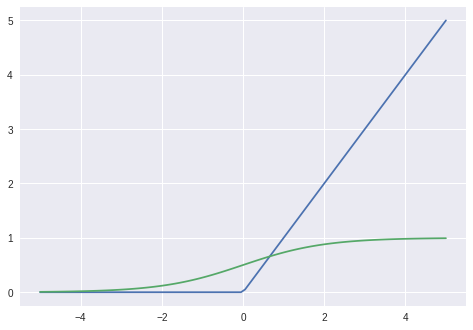

In [6]:
# FUNCIONES DE ACTIVACIÓN

sigm = (lambda x: 1 /(1 + np.e **(-x)),
        lambda x: x * (1 - x))  # derivada de función sigmoide

_x = np.linspace(-5, 5, 100) #Un vector con 100 valores de -5 a 5

#Otras funciones de activación
relu = lambda x: np.maximum(0, _x)
plt.plot(_x, relu(_x))

plt.plot(_x, sigm[0](_x)) # gráfica de función sigmoide
#plt.plot(_x, sigm[1](_x)) # gráfica de derivada función sigmoide        
plt.show()


# Backpropagation
Dentro del algoritmo de backpropagation una de las derivadas que hallamos es la **derivada de la función de activación**



In [0]:
#Creación de capas de forma manual capa x capa
l0 = neural_layer(p, 4, sigm)
l1 = neural_layer(4, 8, sigm)
#...

# Lo haremos de forma iterativa de una manera más cómoda

def create_nn(topology, act_f):
  nn = [] # donde almacenaremos nuestras capas de la red neuronales
  
  for l, layer in enumerate(topology[:-1]):
    nn.append(neural_layer(topology[l], topology[l+1], act_f))
    
  
  return nn

# Entrenamiento de nuestra red neuronal
1. Paso es a partir de unos datos de entrada le damos un resultado esperado y la red empezará a computar para obener un resultado, **desplazamiento hacia adelante.** El primer resultado no será el esperado pero el modelo poco a poco irá aprendiendo acercandose más al resultado esperado

2. Una vez se obtiene un resultado se compara con el vector ***`y`*** real (el resultado esperado) y **se compararía haciendo uso de la función de coste** que es la que nos dice cómo se diferencian ambos resultados. Esto nos generará un error, dicho error se usará para hacer una propagación hacia atrás (backpropagation) para así calcular las derivadas parciales que son las que nos van a permitir obtener la información necesaria para ejecutar el algoritmo de Gradient Descent.

3. El **Descenso del Gradiente** lo que va a permitir es optimizar esa función de coste y entrenar la red neuronal

En el forward pass cogemos nuestro vector de entrada y lo pasamos capa por capa ejecutando cada una de las operaciones que se realizan en cada una de las neuronas:

1. **Suma ponderada** donde se multiplicaba el valor de entrada** `x`** por **`w`** (peso) y le sumabamos el** parámetro de bayas *b***
2. Pasamos la suma ponderada por una **función de activación ** que está en nuestra capa y  agrega distorsión a la red

Una vez  calculado el error procedemos con nuestro algoritmo de **backpropagation** con el cual vamos propagando el erro de la red hacia atrás y calcular la variable denominada **`delta`**

![](http://oi65.tinypic.com/xeq45h.jpg)

In [27]:
topology = [p, 4, 8, 1] #cantidad de neuronas por capa, valores arbitrarios 

neural_net = create_nn(topology, sigm)
# 6 capas ocultas

l2_cost  = (lambda Yp, Yr: np.mean((Yp - Yr)**2), #Función de coste, error cuadrático medio
            lambda Yp, Yr: (Yp - Yr))              #Derivada de la función de coste

def train(neural_net, X, Y, l2_cost, lr = 0.5, train=True):
  
  out = [(None, X)] #Vector para guardar la información (z0, a0), (z1, a1)...

  #Forward pass
  for l, layer in enumerate(neural_net):

    z = out[-1][1] @ neural_net[l].W + neural_net[l].b  # @ es multiplicación matricial, capa 0, out[-1] = output de la capa anterior
    a = neural_net[l].act_f[0](z)                 # salida de la capa 1

    out.append((z, a))

  #print(l2_cost[0](out[-1][1], Y)) # nos da nuestro error 
  
  if train:
  #ENTRENAMIENTO
    #Backpropagation
    deltas = [] #Vector que almacena los delta
    
    for l in reversed(range(0, len(neural_net))):
      
      z = out[l+1][0]
      a = out[l+1][1]
      
      #print(a.shape)
     
      
      if l == len(neural_net)-1:
        # calcular delt de última capa
        deltas.insert(0, l2_cost[1](a, Y) * neural_net[l].act_f[1](a)) #Fórmula 1
        
      else:
        # calcular delta con respecto a capa previa
        deltas.insert(0, deltas[0] @ _W.T * neural_net[l].act_f[1](a)) #Fórmula 2
        
      _W = neural_net[l].W
    
      #Gradient Descent - Fórmula 3
      neural_net[l].b = neural_net[l].b - np.mean(deltas[0], axis= 0, keepdims=True) * lr # Coste en funcion de parámetro de bayes
      neural_net[l].W = neural_net[l].W - out[l][1].T @ deltas[0] *lr 
      
  return out[-1][1]
    
train(neural_net, X, Y, l2_cost, 0.5)
  
print("")

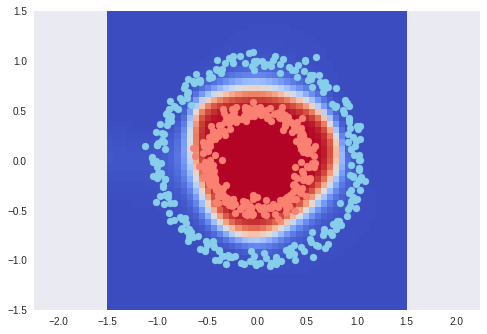

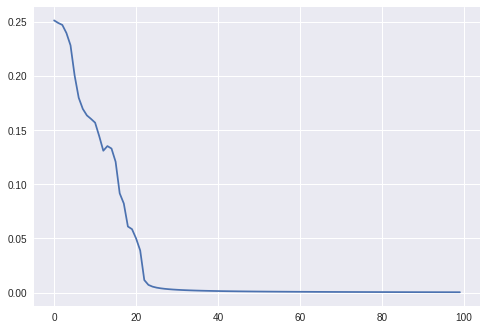

In [31]:
import time
from IPython.display import clear_output

neural_n = create_nn(topology, sigm)

loss = []

for i in range(2500):
  
  # Entremos a la red!
  pY = train(neural_n, X, Y, l2_cost, lr=0.05)
  
  if i % 25 == 0:   # Cada 25 iteraciones
  
    print(pY)
    loss.append(l2_cost[0](pY, Y))
    
    res = 50
    
    _x0 = np.linspace(-1.5, 1.5, res)
    _x1 = np.linspace(-1.5, 1.5, res)
    
    _Y = np.zeros((res, res))
    
    for i0, x0 in enumerate(_x0):
      for i1, x1 in enumerate(_x1):
        _Y[i0, i1] = train(neural_n, np.array([[x0, x1]]), Y, l2_cost, train=False)[0][0]
        
   
    plt.pcolormesh(_x0, _x1, _Y, cmap="coolwarm")
    plt.axis("equal")
    
    plt.scatter(X[Y[:,0] == 0, 0], X[Y[:,0] == 0, 1], c="skyblue")
    plt.scatter(X[Y[:,0] == 1, 0], X[Y[:,0] == 1, 1], c="salmon")
    
    
    clear_output(wait=True)
    plt.show()
    plt.plot(range(len(loss)), loss)
    plt.show()
    time.sleep(0.5)
